<a href="https://colab.research.google.com/github/ShreyaPatil277/Sentiment-Analysis-to-Gauge-Mental-Health-Trends-among-Students-/blob/main/Mental_Health_Text_Analysis_DRTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK
import kagglehub
suchintikasarkar_sentiment_analysis_for_mental_health_path = kagglehub.dataset_download('suchintikasarkar/sentiment-analysis-for-mental-health')
evilspirit05_wordcloud_mask_collection_path = kagglehub.dataset_download('evilspirit05/wordcloud-mask-collection')

print('Data source import complete.')


Using Colab cache for faster access to the 'sentiment-analysis-for-mental-health' dataset.


100%|██████████| 140k/140k [00:00<00:00, 15.2MB/s]

Extracting files...
Data source import complete.


In [ ]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
import nltk
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    log_loss,
    hamming_loss,
    matthews_corrcoef,
    zero_one_loss,
    jaccard_score,
    multilabel_confusion_matrix
)

nltk.download('vader_lexicon')
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
df=pd.read_csv("/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv")

In [ ]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
df.shape

(53043, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [ ]:
df.isnull().sum()

,0
statement,362
status,0


In [ ]:
mode=df["statement"].mode()[0]
df["statement"]=df["statement"].fillna(mode)

In [ ]:
df.isnull().sum()

,0
statement,0
status,0


In [ ]:
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df["status"].value_counts()

,count
status,
Normal,16351
Depression,15404
Suicidal,10653
Anxiety,3888
Bipolar,2877
Stress,2669
Personality disorder,1201


/tmp/ipython-input-593102360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette='crest')


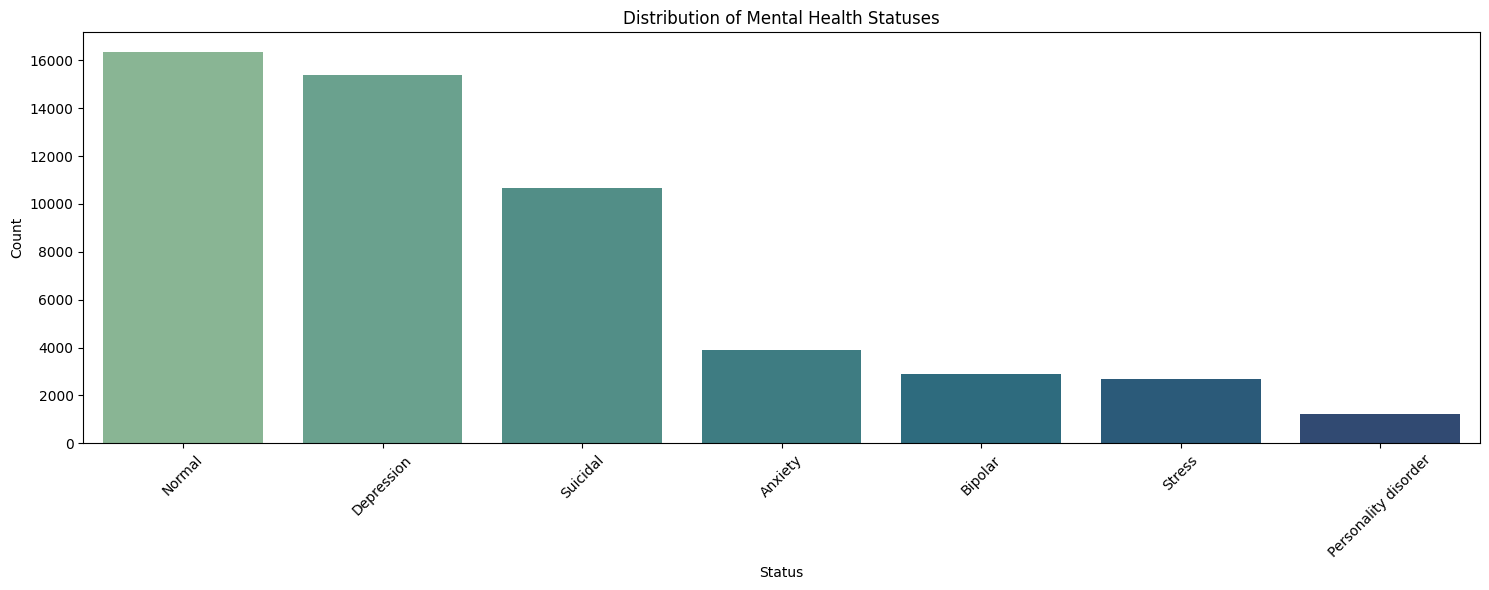

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette='crest')

plt.title('Distribution of Mental Health Statuses')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

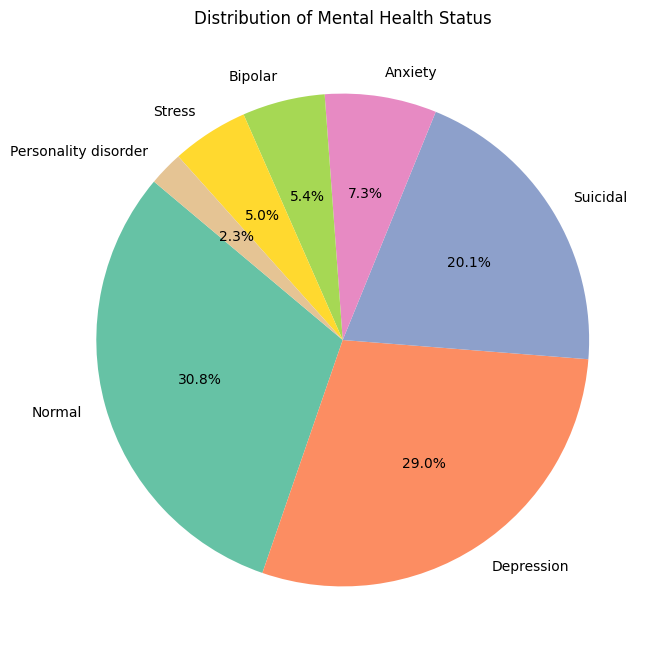

In [ ]:

status_counts = df['status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',       # show percentages
    startangle=140,          # rotate start angle
    colors=sns.color_palette("Set2")  # same palette as before
)
plt.title("Distribution of Mental Health Status")
plt.show()


Using Colab cache for faster access to the 'sentiment-analysis-for-mental-health' dataset.


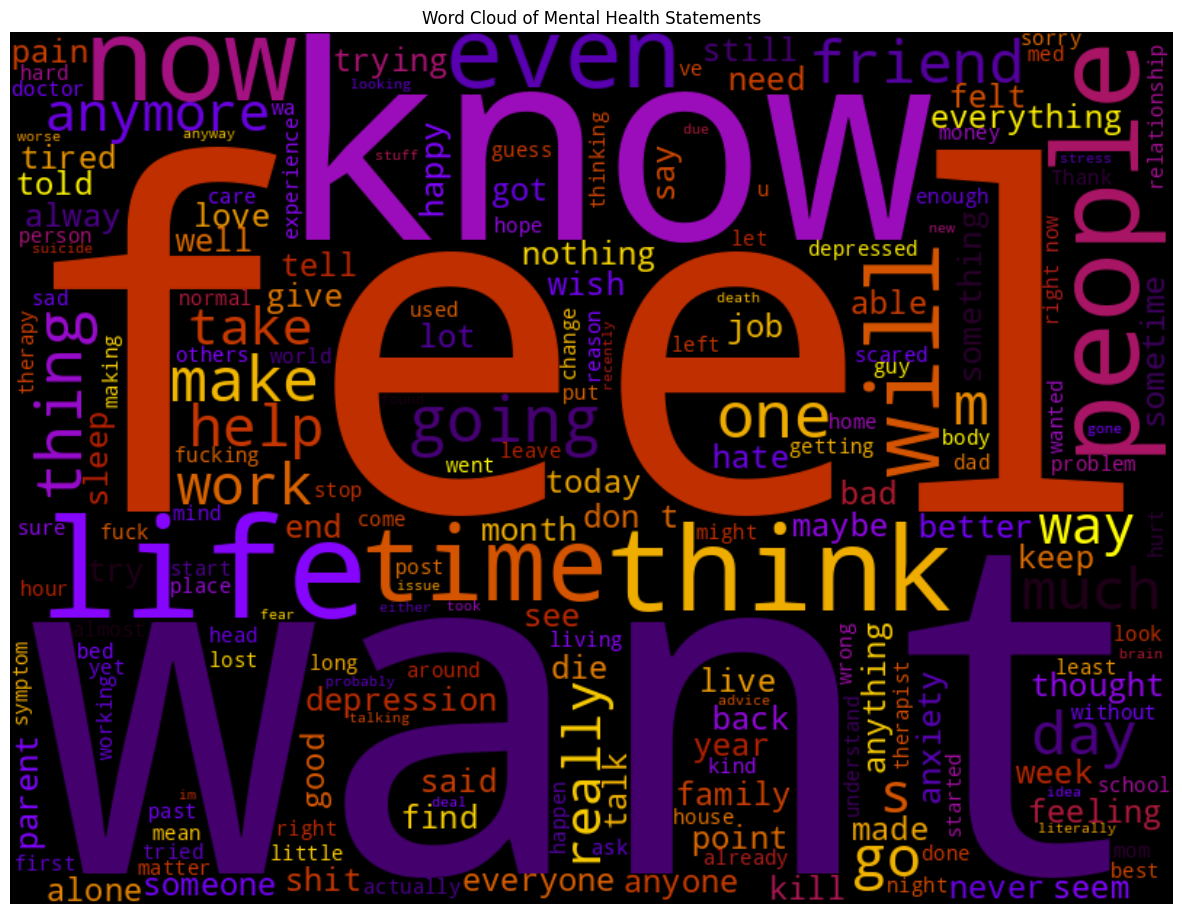

In [ ]:

suchintikasarkar_sentiment_analysis_for_mental_health_path = kagglehub.dataset_download('suchintikasarkar/sentiment-analysis-for-mental-health')
df=pd.read_csv("/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv")
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)
mode=df["statement"].mode()[0]
df["statement"]=df["statement"].fillna(mode)

text = ' '.join(df['statement'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=800, height=600, background_color='black', min_font_size=10,
                      stopwords=stopwords, colormap="gnuplot").generate(text)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Mental Health Statements')
plt.show()

/tmp/ipython-input-780635715.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words_df, x='Word', y='Frequency', palette='gnuplot')


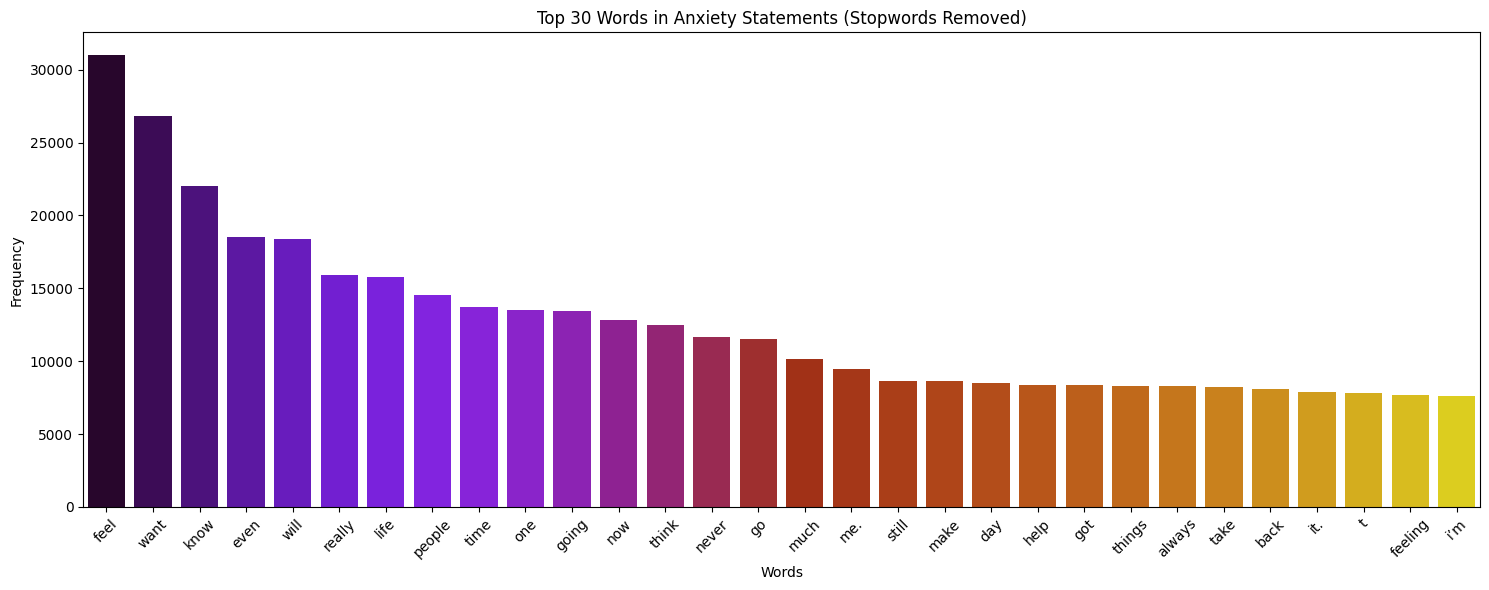

In [ ]:
stopwords = set(STOPWORDS)
words = ' '.join(df['statement']).split()
filtered_words = [word.lower() for word in words if word.lower() not in stopwords]

word_counts = Counter(filtered_words)
top_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:30])

top_words_df = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])
plt.figure(figsize=(15, 6))
sns.barplot(data=top_words_df, x='Word', y='Frequency', palette='gnuplot')
plt.title('Top 30 Words in Anxiety Statements (Stopwords Removed)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-703508378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status', y='word_count', data=df, estimator=np.mean, order=df['status'].value_counts().index,palette="winter")


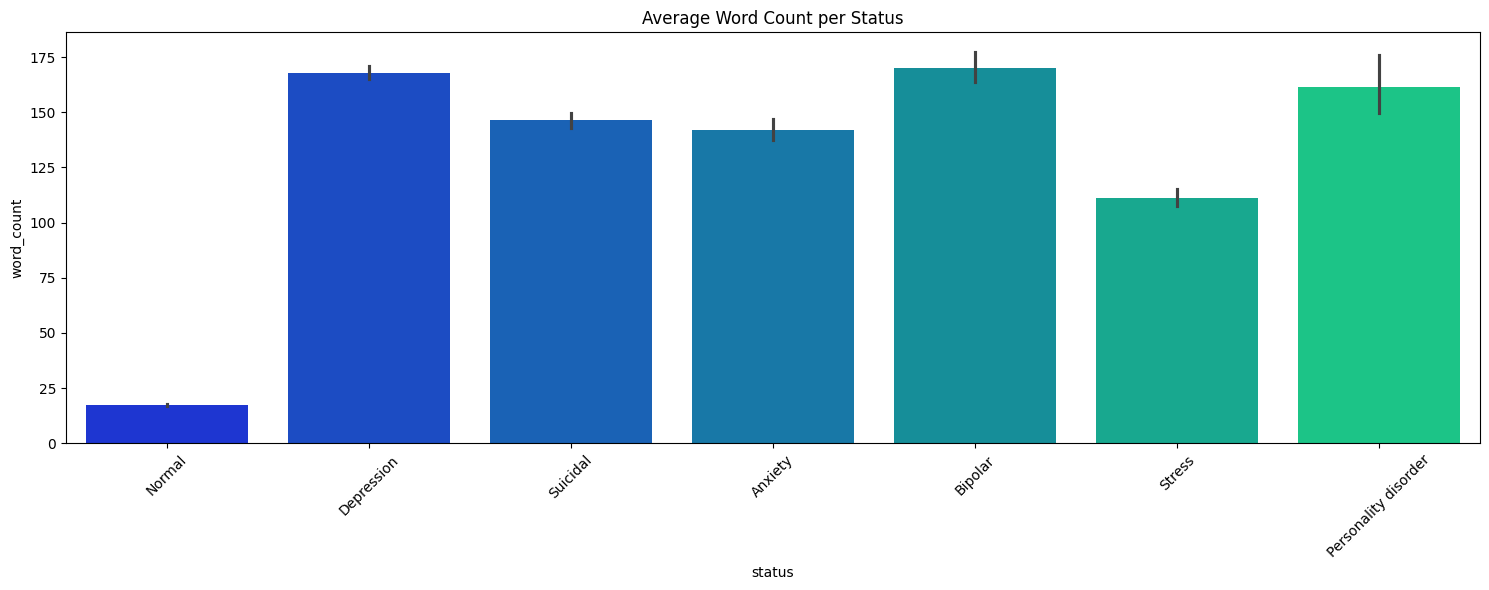

In [ ]:
df['word_count'] = df['statement'].apply(lambda x: len(x.split()))
plt.figure(figsize=(15, 6))
sns.barplot(x='status', y='word_count', data=df, estimator=np.mean, order=df['status'].value_counts().index,palette="winter")
plt.title('Average Word Count per Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


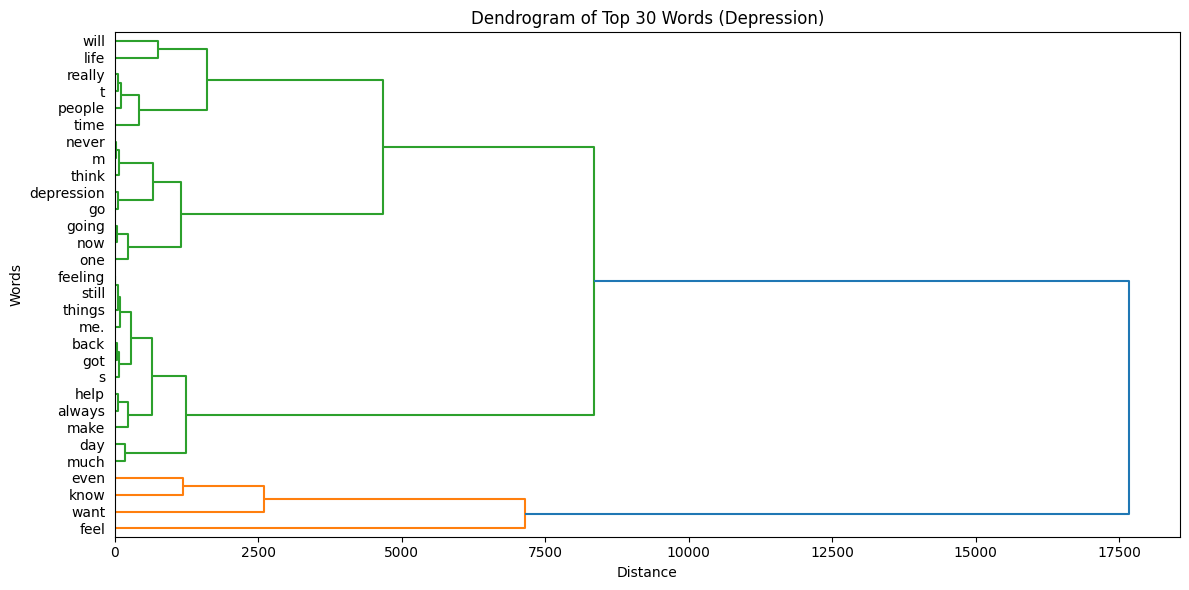

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from collections import Counter
from wordcloud import STOPWORDS

# 🔹 Filter depression statements
depression_df = df[df['label'] == 2]

# 🔹 Remove stopwords
stopwords = set(STOPWORDS)
words = ' '.join(depression_df['statement']).split()
filtered_words = [word.lower() for word in words if word.lower() not in stopwords]

# 🔹 Get top 30 words
word_counts = Counter(filtered_words)
top_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:30])

# 🔹 Convert to DataFrame
top_words_df = pd.DataFrame(list(top_words.items()), columns=["Word", "Frequency"])

# 🔹 Perform hierarchical clustering
linked = linkage(top_words_df[["Frequency"]], method='ward')

# 🔹 Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=top_words_df["Word"].values, orientation="right", leaf_font_size=10)
plt.title("Dendrogram of Top 30 Words (Depression)")
plt.xlabel("Distance")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

In [ ]:
print(df['label'].unique())
print(df['status'].unique())

[0 3 2 6 5 1 4]
['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


/tmp/ipython-input-1694893486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y='char_count', order=df['status'].value_counts().index, palette='brg')


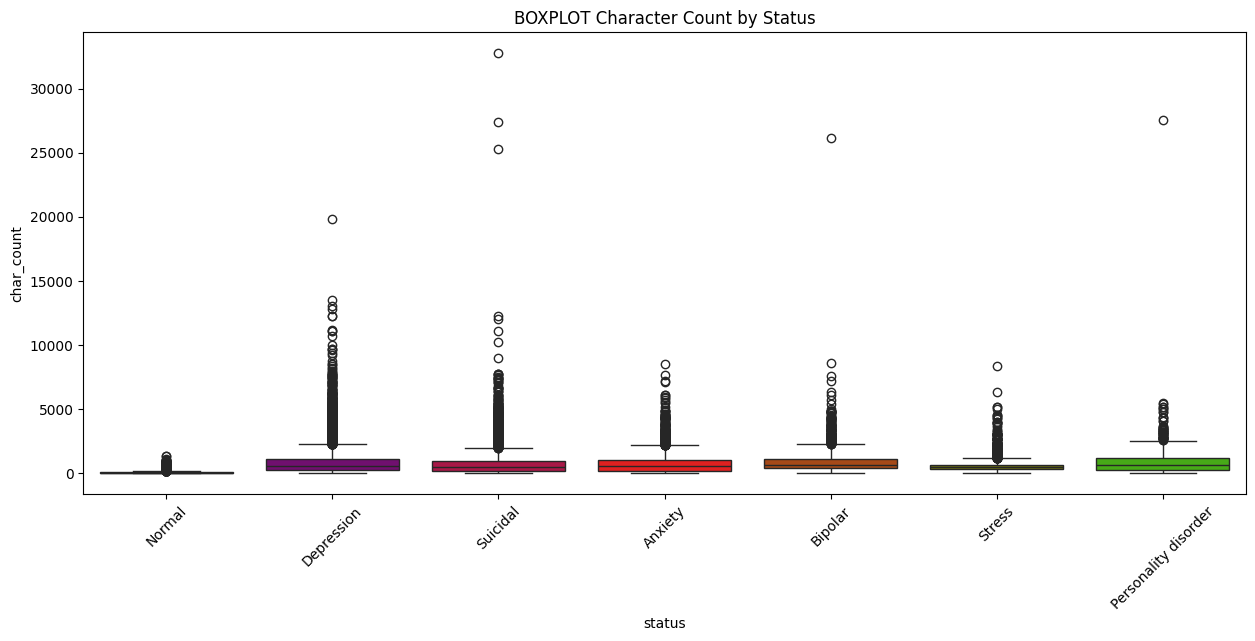

In [ ]:
df['char_count'] = df['statement'].apply(len)
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='status', y='char_count', order=df['status'].value_counts().index, palette='brg')
plt.title('BOXPLOT Character Count by Status')
plt.xticks(rotation=45)
plt.show()

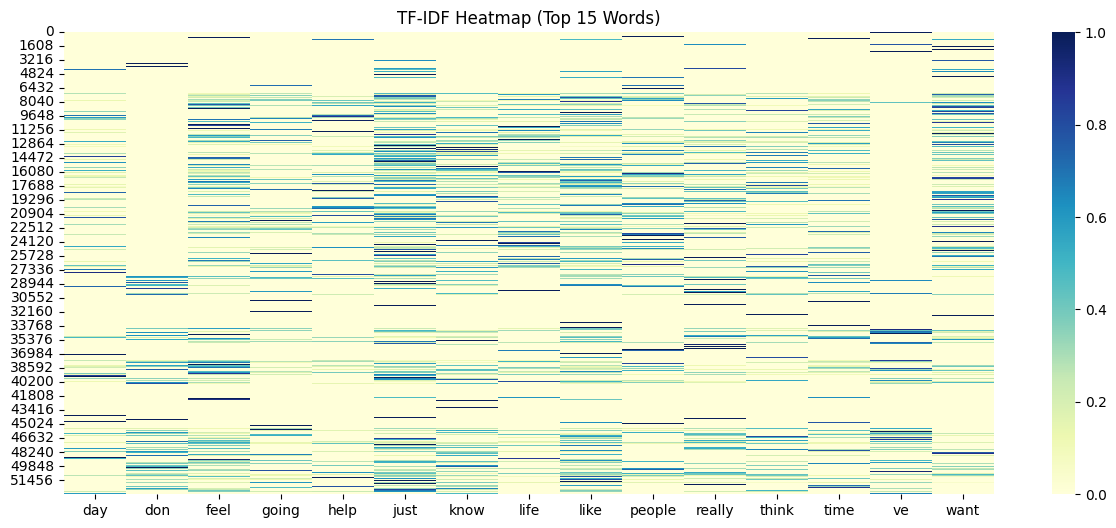

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=15, stop_words='english')
X = tfidf.fit_transform(df['statement'])
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

plt.figure(figsize=(15, 6))
sns.heatmap(tfidf_df, cmap='YlGnBu')
plt.title('TF-IDF Heatmap (Top 15 Words)')
plt.show()

/tmp/ipython-input-1165700299.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigram_df, x='Bigram', y='Count', palette='mako')


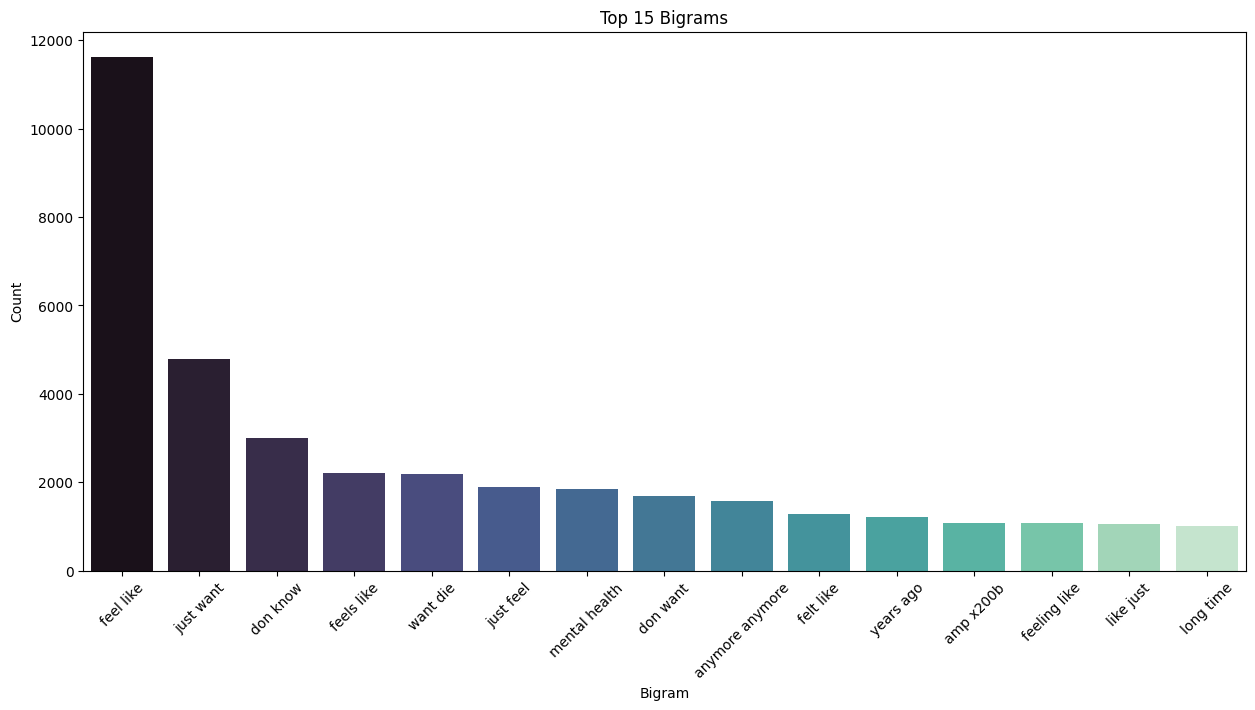

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vec.fit_transform(df['statement'])
sum_bigrams = bigrams.sum(axis=0)
bigram_freq = [(word, sum_bigrams[0, idx]) for word, idx in vec.vocabulary_.items()]
top_bigrams = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:15]

bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Count'])
plt.figure(figsize=(15,7))
sns.barplot(data=bigram_df, x='Bigram', y='Count', palette='mako')
plt.xticks(rotation=45)
plt.title('Top 15 Bigrams')
plt.show()

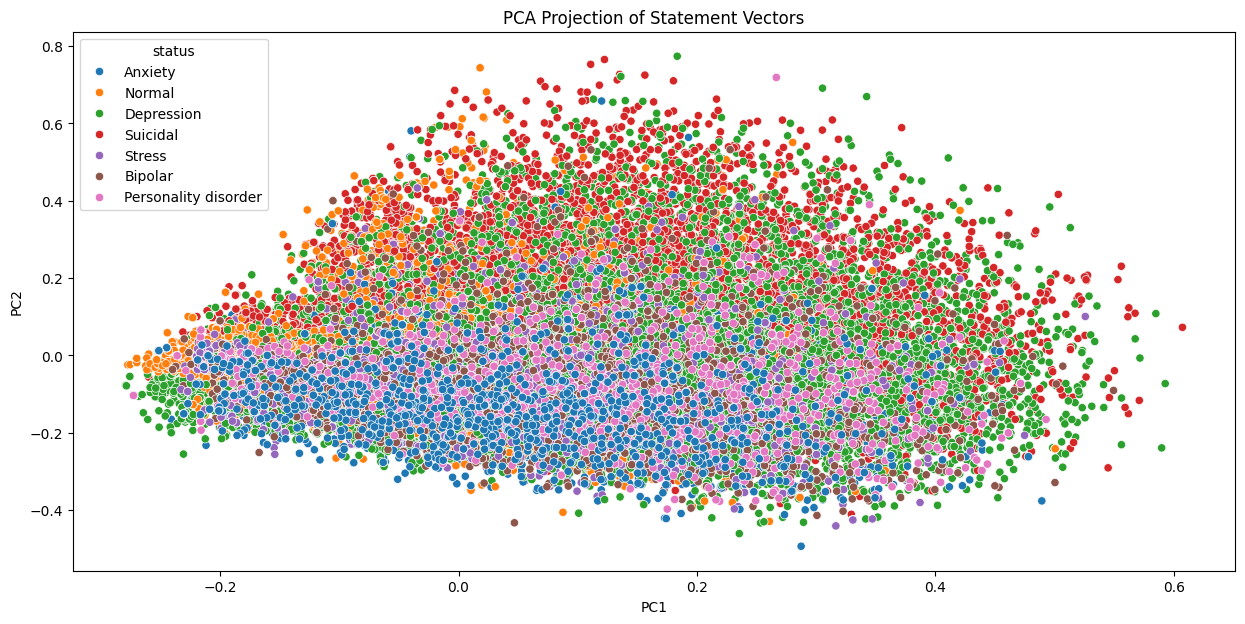

In [ ]:

from sklearn.decomposition import PCA

tfidf = TfidfVectorizer(max_features=100, stop_words='english')
X = tfidf.fit_transform(df['statement'])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['status'] = df['status'].values

plt.figure(figsize=(15, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='status', palette='tab10')
plt.title('PCA Projection of Statement Vectors')
plt.show()


In [ ]:
from transformers import AutoTokenizer, RobertaForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")
model = RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base",num_labels=7)
model.to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [ ]:
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
le=LabelEncoder()
df["label"]=le.fit_transform(df["status"])
print(dict(zip(le.classes_,range(len(le.classes_)))))

{'Anxiety': 0, 'Bipolar': 1, 'Depression': 2, 'Normal': 3, 'Personality disorder': 4, 'Stress': 5, 'Suicidal': 6}


In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["statement"], padding="max_length", truncation=True, max_length=64)
dataset = Dataset.from_pandas(df[["statement", "label"]])
tokenized_dataset = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/53043 [00:00<?, ? examples/s]

In [ ]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
train_dataset = Dataset.from_pandas(train_df[["statement", "label"]]).map(tokenize_function, batched=True)
val_dataset = Dataset.from_pandas(val_df[["statement", "label"]]).map(tokenize_function, batched=True)
test_dataset = Dataset.from_pandas(test_df[["statement", "label"]]).map(tokenize_function, batched=True)

Map:   0%|          | 0/42434 [00:00<?, ? examples/s]

Map:   0%|          | 0/5304 [00:00<?, ? examples/s]

Map:   0%|          | 0/5305 [00:00<?, ? examples/s]

In [ ]:
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
from tabulate import tabulate
import time

optimizer = AdamW(model.parameters(), lr=0.00002)
num_epochs = 10
total_steps = len(train_dataloader) * num_epochs

scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,num_training_steps=total_steps)


loss_fn = nn.CrossEntropyLoss().to(device)



In [ ]:
model = RobertaForSequenceClassification.from_pretrained("distilroberta-base", num_labels=7)
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
from tabulate import tabulate
import time

scaler = torch.cuda.amp.GradScaler()
model.to(device) # Add this line to move the model to the device

optimizer = AdamW(model.parameters(), lr=0.00002)
num_epochs = 10
total_steps = len(train_dataloader) * num_epochs

scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,num_training_steps=total_steps)


loss_fn = nn.CrossEntropyLoss().to(device)

for batch in train_dataloader:
    optimizer.zero_grad()
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["label"].to(device)
    with torch.cuda.amp.autocast():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, labels)

    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()
    scheduler.step()

/tmp/ipython-input-389251576.py:9: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/tmp/ipython-input-389251576.py:26: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


In [ ]:
gradient_accumulation_steps = 2  # 16×2 = effective 32


In [ ]:
from torch.cuda.amp import autocast, GradScaler
import os

# Initialize lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
metrics_table = []

# Initialize mixed precision scaler
scaler = GradScaler()

# Training loop
start_epoch = 0  # if resuming, update using load_checkpoint

# Initialize early stopping variables
best_val_loss = float('inf')
patience = 3
patience_counter = 0

# Create checkpoint directory if it doesn't exist
checkpoint_dir = "/kaggle/working/checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)


for epoch in range(start_epoch, num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")

    # ---------------- Training ----------------
    train_start_time = time.time()
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0
    for batch in tqdm(train_dataloader, desc="Training"):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()

        # 🔥 Mixed precision forward & loss
        with autocast():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_fn(logits, labels)

        # Backward pass with scaling
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        train_loss += loss.item()
        _, preds = torch.max(logits, dim=1)
        train_correct += torch.sum(preds == labels).item()
        train_total += labels.size(0)

    train_end_time = time.time()
    train_time = train_end_time - train_start_time
    avg_train_loss = train_loss / len(train_dataloader)
    train_accuracy = train_correct / train_total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # ---------------- Validation ----------------
    val_start_time = time.time()
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc="Validation"):
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            # 🔥 Use autocast for inference too
            with autocast():
                outputs = model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                loss = loss_fn(logits, labels)

            val_loss += loss.item()
            _, preds = torch.max(logits, dim=1)
            val_correct += torch.sum(preds == labels).item()
            val_total += labels.size(0)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_end_time = time.time()
    val_time = val_end_time - val_start_time
    avg_val_loss = val_loss / len(val_dataloader)
    val_accuracy = val_correct / val_total
    val_f1 = f1_score(val_labels, val_preds, average="weighted")
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    val_f1_scores.append(val_f1)

    # ---------------- Metrics ----------------
    epoch_time = train_time + val_time
    metrics_table.append([
        epoch + 1,
        f"{avg_train_loss:.4f}",
        f"{train_accuracy:.4f}",
        f"{avg_val_loss:.4f}",
        f"{val_accuracy:.4f}",
        f"{val_f1:.4f}",
        f"{train_time:.2f}s",
        f"{val_time:.2f}s",
        f"{epoch_time:.2f}s"
    ])
    headers = ["Epoch", "Train Loss", "Train Accuracy", "Val Loss", "Val Accuracy", "Val F1", "Train Time", "Val Time", "Epoch Time"]
    print("\nMetrics:")
    print(tabulate(metrics_table, headers=headers, tablefmt="grid"))

    # ---------------- Save Checkpoint ----------------
    checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch+1}.pt")
    # Need to define save_checkpoint function or remove this line if not needed
    # save_checkpoint(epoch, model, optimizer, scheduler, avg_val_loss, checkpoint_path)

    # ---------------- Early Stopping ----------------
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        # Need to define model.save_pretrained or remove this line if not needed
        # model.save_pretrained("/kaggle/working/best_roberta_emotion")
        # Need to define tokenizer.save_pretrained or remove this line if not needed
        # tokenizer.save_pretrained("/kaggle/working/best_roberta_emotion")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("⏹️ Early stopping triggered")
            break

/tmp/ipython-input-1704562019.py:13: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()



Epoch 1/10


Training:   0%|          | 0/1327 [00:00<?, ?it/s]/tmp/ipython-input-1704562019.py:45: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation:   0%|          | 0/166 [00:00<?, ?it/s]/tmp/ipython-input-1704562019.py:84: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 166/166 [00:02<00:00, 63.92it/s]



Metrics:
+---------+--------------+------------------+------------+----------------+----------+--------------+------------+--------------+
|   Epoch |   Train Loss |   Train Accuracy |   Val Loss |   Val Accuracy |   Val F1 | Train Time   | Val Time   | Epoch Time   |
+=========+==============+==================+============+================+==========+==============+============+==============+
|       1 |       0.1568 |           0.9371 |     0.6113 |          0.812 |   0.8126 | 105.58s      | 2.60s      | 108.18s      |
+---------+--------------+------------------+------------+----------------+----------+--------------+------------+--------------+

Epoch 2/10


Training:   0%|          | 0/1327 [00:00<?, ?it/s]/tmp/ipython-input-1704562019.py:45: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation:   0%|          | 0/166 [00:00<?, ?it/s]/tmp/ipython-input-1704562019.py:84: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 166/166 [00:02<00:00, 66.19it/s]



Metrics:
+---------+--------------+------------------+------------+----------------+----------+--------------+------------+--------------+
|   Epoch |   Train Loss |   Train Accuracy |   Val Loss |   Val Accuracy |   Val F1 | Train Time   | Val Time   | Epoch Time   |
+=========+==============+==================+============+================+==========+==============+============+==============+
|       1 |       0.1568 |           0.9371 |     0.6113 |         0.812  |   0.8126 | 105.58s      | 2.60s      | 108.18s      |
+---------+--------------+------------------+------------+----------------+----------+--------------+------------+--------------+
|       2 |       0.1267 |           0.9521 |     0.6665 |         0.8109 |   0.8108 | 115.17s      | 2.51s      | 117.68s      |
+---------+--------------+------------------+------------+----------------+----------+--------------+------------+--------------+

Epoch 3/10


Training:   0%|          | 0/1327 [00:00<?, ?it/s]/tmp/ipython-input-1704562019.py:45: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation:   0%|          | 0/166 [00:00<?, ?it/s]/tmp/ipython-input-1704562019.py:84: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 166/166 [00:02<00:00, 65.65it/s]



Metrics:
+---------+--------------+------------------+------------+----------------+----------+--------------+------------+--------------+
|   Epoch |   Train Loss |   Train Accuracy |   Val Loss |   Val Accuracy |   Val F1 | Train Time   | Val Time   | Epoch Time   |
+=========+==============+==================+============+================+==========+==============+============+==============+
|       1 |       0.1568 |           0.9371 |     0.6113 |         0.812  |   0.8126 | 105.58s      | 2.60s      | 108.18s      |
+---------+--------------+------------------+------------+----------------+----------+--------------+------------+--------------+
|       2 |       0.1267 |           0.9521 |     0.6665 |         0.8109 |   0.8108 | 115.17s      | 2.51s      | 117.68s      |
+---------+--------------+------------------+------------+----------------+----------+--------------+------------+--------------+
|       3 |       0.1036 |           0.9601 |     0.702  |         0.8086 |   0.

Training:   0%|          | 0/1327 [00:00<?, ?it/s]/tmp/ipython-input-1704562019.py:45: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation:   0%|          | 0/166 [00:00<?, ?it/s]/tmp/ipython-input-1704562019.py:84: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 166/166 [00:02<00:00, 66.35it/s]


Metrics:
+---------+--------------+------------------+------------+----------------+----------+--------------+------------+--------------+
|   Epoch |   Train Loss |   Train Accuracy |   Val Loss |   Val Accuracy |   Val F1 | Train Time   | Val Time   | Epoch Time   |
+=========+==============+==================+============+================+==========+==============+============+==============+
|       1 |       0.1568 |           0.9371 |     0.6113 |         0.812  |   0.8126 | 105.58s      | 2.60s      | 108.18s      |
+---------+--------------+------------------+------------+----------------+----------+--------------+------------+--------------+
|       2 |       0.1267 |           0.9521 |     0.6665 |         0.8109 |   0.8108 | 115.17s      | 2.51s      | 117.68s      |
+---------+--------------+------------------+------------+----------------+----------+--------------+------------+--------------+
|       3 |       0.1036 |           0.9601 |     0.702  |         0.8086 |   0.

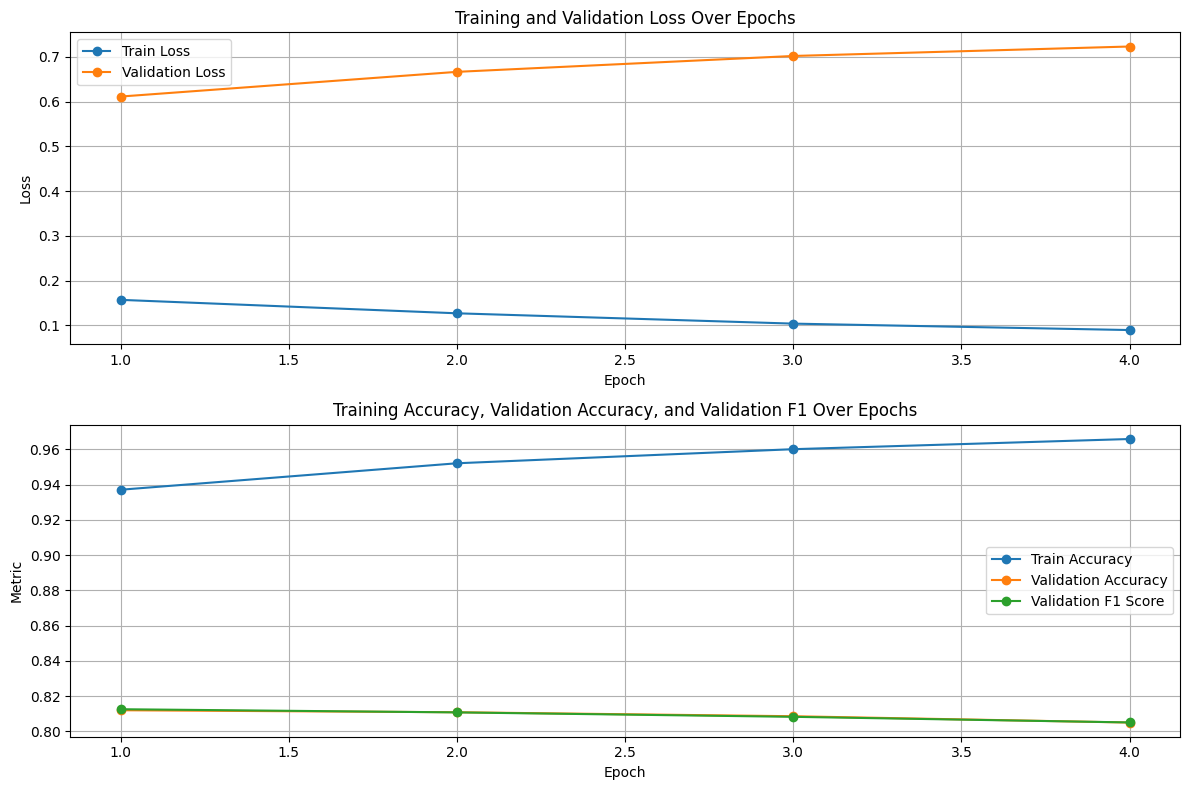

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot Loss
plt.subplot(2, 1, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss", marker="o")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss", marker="o")
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Plot Accuracy and F1
plt.subplot(2, 1, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy", marker="o")
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", marker="o")
plt.plot(range(1, len(val_f1_scores) + 1), val_f1_scores, label="Validation F1 Score", marker="o")
plt.title("Training Accuracy, Validation Accuracy, and Validation F1 Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
label_name=['Anxiety', 'Bipolar', 'Depression', 'Normal', 'Personality disorder', 'Stress', 'Suicidal']

In [ ]:
model.eval()
test_loss = 0
test_correct = 0
test_total = 0
test_preds = []
test_labels = []

with torch.no_grad():
    for batch in tqdm(test_dataloader, desc="Testing"):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, labels)

        test_loss += loss.item()
        _, preds = torch.max(logits, dim=1)
        test_correct += torch.sum(preds == labels).item()
        test_total += labels.size(0)

        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

# Calculate average loss and metrics
avg_test_loss = test_loss / len(test_dataloader)
test_accuracy = test_correct / test_total
test_f1 = f1_score(test_labels, test_preds, average="weighted")

# Print summary table
print("\nTest Metrics:")
print(tabulate([[avg_test_loss, test_accuracy, test_f1]],
               headers=["Test Loss", "Test Accuracy", "Test F1"],
               tablefmt="grid"))

# Print full classification report
print("\nDetailed Classification Report:")
print(classification_report(test_labels, test_preds, digits=4,target_names=label_name))


Testing: 100%|██████████| 166/166 [00:02<00:00, 64.93it/s]


Test Metrics:
+-------------+-----------------+-----------+
|   Test Loss |   Test Accuracy |   Test F1 |
+=============+=================+===========+
|    0.712824 |        0.805844 |  0.806585 |
+-------------+-----------------+-----------+

Detailed Classification Report:
                      precision    recall  f1-score   support

             Anxiety     0.8721    0.8789    0.8755       380
             Bipolar     0.8556    0.8464    0.8510       280
          Depression     0.7633    0.7280    0.7452      1581
              Normal     0.9570    0.9529    0.9549      1635
Personality disorder     0.6438    0.7705    0.7015       122
              Stress     0.7500    0.7370    0.7435       289
            Suicidal     0.6376    0.6758    0.6562      1018

            accuracy                         0.8058      5305
           macro avg     0.7828    0.7985    0.7897      5305
        weighted avg     0.8081    0.8058    0.8066      5305



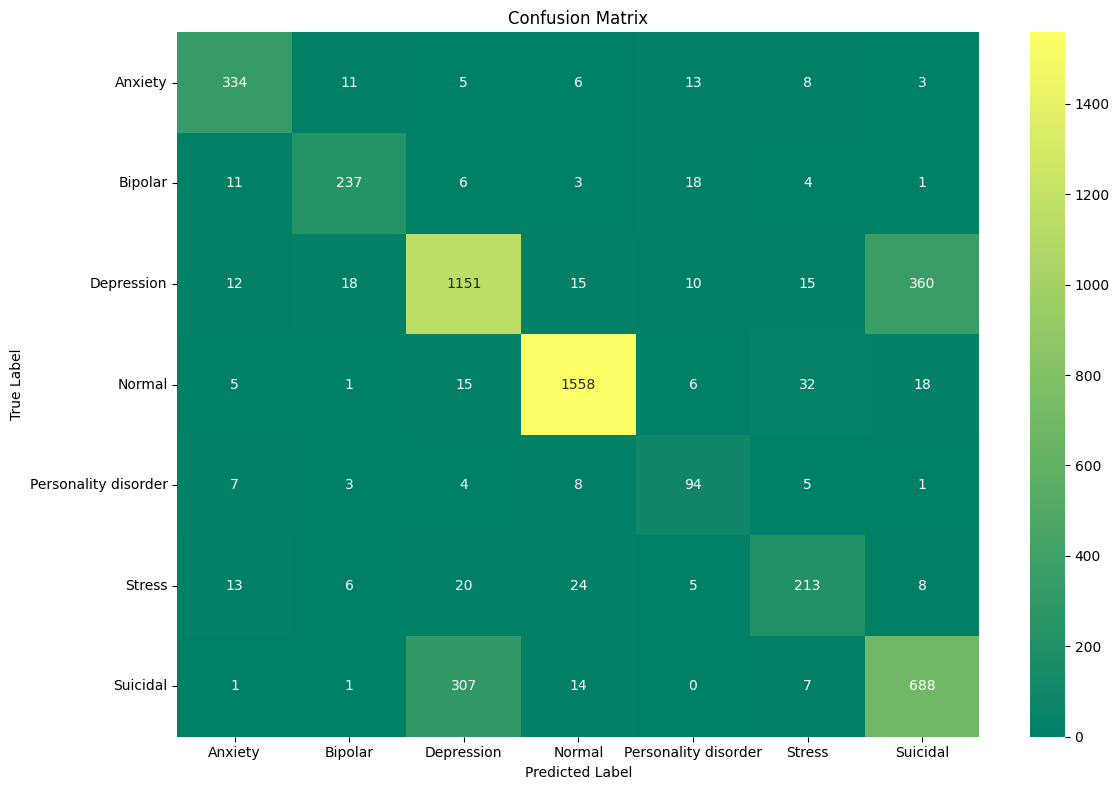

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="summer", xticklabels=label_name, yticklabels=label_name)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score,
    roc_auc_score, cohen_kappa_score, log_loss
)

num_classes = len(np.unique(test_labels))
y_true_bin = label_binarize(test_labels, classes=list(range(num_classes)))
y_score = np.array(test_probs)

print("=== Classification Metrics ===")
print(f"Accuracy         : {accuracy_score(test_labels, test_preds):.4f}")
print(f"F1 Score (Macro) : {f1_score(test_labels, test_preds, average='macro'):.4f}")
print(f"Recall (Macro)   : {recall_score(test_labels, test_preds, average='macro'):.4f}")
print(f"Precision (Macro): {precision_score(test_labels, test_preds, average='macro'):.4f}")
print(f"ROC AUC Score    : {roc_auc_score(y_true_bin, y_score, average='macro'):.4f}")
print(f"Cohen Kappa Score: {cohen_kappa_score(test_labels, test_preds):.4f}")
print(f"Log Loss         : {log_loss(y_true_bin, y_score):.4f}")

=== Classification Metrics ===
Accuracy         : 0.8058
F1 Score (Macro) : 0.7897
Recall (Macro)   : 0.7985
Precision (Macro): 0.7828
ROC AUC Score    : 0.9709
Cohen Kappa Score: 0.7479
Log Loss         : 0.7128


In [ ]:
def predict_batch_statements(texts, model, tokenizer, device):
    model.eval()

    inputs = tokenizer(texts,padding="max_length",truncation=True,max_length=128,return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=1)
        pred_idxs = torch.argmax(probs, dim=1).cpu().numpy()
        confidences = probs.max(dim=1).values.cpu().numpy()

    results = []
    for idx, conf in zip(pred_idxs, confidences):
        results.append((label_name[idx], conf))
    return results


model.to(device)

texts = [
    "I feel constant worry and nervousness all day.",               # Anxiety
    "My moods change dramatically and unpredictably.",               # Bipolar
    "I’ve been feeling very sad and hopeless lately.",               # Depression
    "I’m doing well and feel balanced emotionally.",                 # Normal
    "I often find it hard to relate to others and myself.",          # Personality disorder
    "Work pressure and daily life stress are overwhelming me.",      # Stress
    "Sometimes I think life isn’t worth living anymore.",             # Suicidal
]

predictions = predict_batch_statements(texts, model, tokenizer, device)
for text, (label, conf) in zip(texts, predictions):
    print(f"Text: {text}\nPredicted: {label} (confidence: {conf:.4f})\n")


Text: I feel constant worry and nervousness all day.
Predicted: Anxiety (confidence: 0.6784)

Text: My moods change dramatically and unpredictably.
Predicted: Bipolar (confidence: 0.7520)

Text: I’ve been feeling very sad and hopeless lately.
Predicted: Depression (confidence: 0.7607)

Text: I’m doing well and feel balanced emotionally.
Predicted: Normal (confidence: 0.9949)

Text: I often find it hard to relate to others and myself.
Predicted: Normal (confidence: 0.9990)

Text: Work pressure and daily life stress are overwhelming me.
Predicted: Stress (confidence: 0.9322)

Text: Sometimes I think life isn’t worth living anymore.
Predicted: Depression (confidence: 0.7945)

